# Pridecting Survivel On the Titanic

## Description Of the Project

The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. 
Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not.

## Attribute information

1. Passenger id- Unique Id of the passenger
2. Pclass- Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
3. Survived- Survived (0 = No; 1 = Yes)
4. Name- Name of the passenger
5. Sex- Sex of the passenger (Male, Female)
6. Age- Age of the passenger
7. Sibsp- Number of Siblings/Spouses Aboard
8. Parch- Number of Parents/Children Aboard
9. Ticket- Ticket Number
10. Fare- Passenger Fare (British pound)
11. Cabin- Cabin
12. Embarked- Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

## Datasets

https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Titanic/titanic_train.csv

# Import the Libraries

In [45]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Import Dataset

In [46]:
df = pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Titanic/titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [47]:
df.shape

(891, 12)

There are data available in this datasets 891 rows and 12 columns

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


There are three type of Data type (int, object and Float) available in this datasets

In [49]:
# Checking null value peresent in this datasets
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In this dataset null values presented in two colunms Age and Cabin but in this Cabin most of data are null value so that we can drop this column.

In [50]:
# Drop cabin column as maney values are missing
df.drop('Cabin',inplace=True, axis=1)

In [51]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# Data Preprocessing

In [52]:
# Removeing the columns

df = df.drop(columns=['PassengerId','Name','Ticket'], axis= 1)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [54]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [55]:
# Checking data type
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [56]:
# Checking Unique values counts
df.nunique()

Survived      2
Pclass        3
Sex           2
Age          88
SibSp         7
Parch         7
Fare        248
Embarked      3
dtype: int64

In [57]:
# Checking for missing values counts
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [58]:
# Replaceing the missing values

df['Age'] = df['Age'].replace(np.nan,df['Age'].median(axis=0))
df['Embarked'] = df['Embarked'].replace(np.nan, 'S')

In [59]:
# checking for missing value in dataset after refining the dataset
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [60]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [61]:
# type casting Age to integer
df['Age'] = df['Age'].astype(int)

In [62]:
# replacing male with 1 and female with 0
df['Sex'] = df['Sex'].apply(lambda x : 1 if x == 'male' else 0)

### Categorising in groups i.e. Infant(0-5), Teen (6-20), 20s(21-30), 30s(31-40), 40s(41-50), 50s(51-60), Elder(61-100)

In [63]:
# creating age groups - young (0-18), adult(18-30), middle aged(30-50), old(50-100)
df['Age'] = pd.cut(x=df['Age'], bins=[0, 5, 20, 30, 40, 50, 60, 100], labels = ['Infant', 'Tean', '20s', '30s', '40s', '50s', 'Elder'])    

In [64]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,20s,1,0,7.2500,S
1,1,1,0,30s,1,0,71.2833,C
2,1,3,0,20s,0,0,7.9250,S
3,1,1,0,30s,1,0,53.1000,S
4,0,3,1,30s,0,0,8.0500,S


# Exploratory Data Analysis(EDA)

### Plotting the countplot to visulize the numbers

<Axes: xlabel='Parch', ylabel='count'>

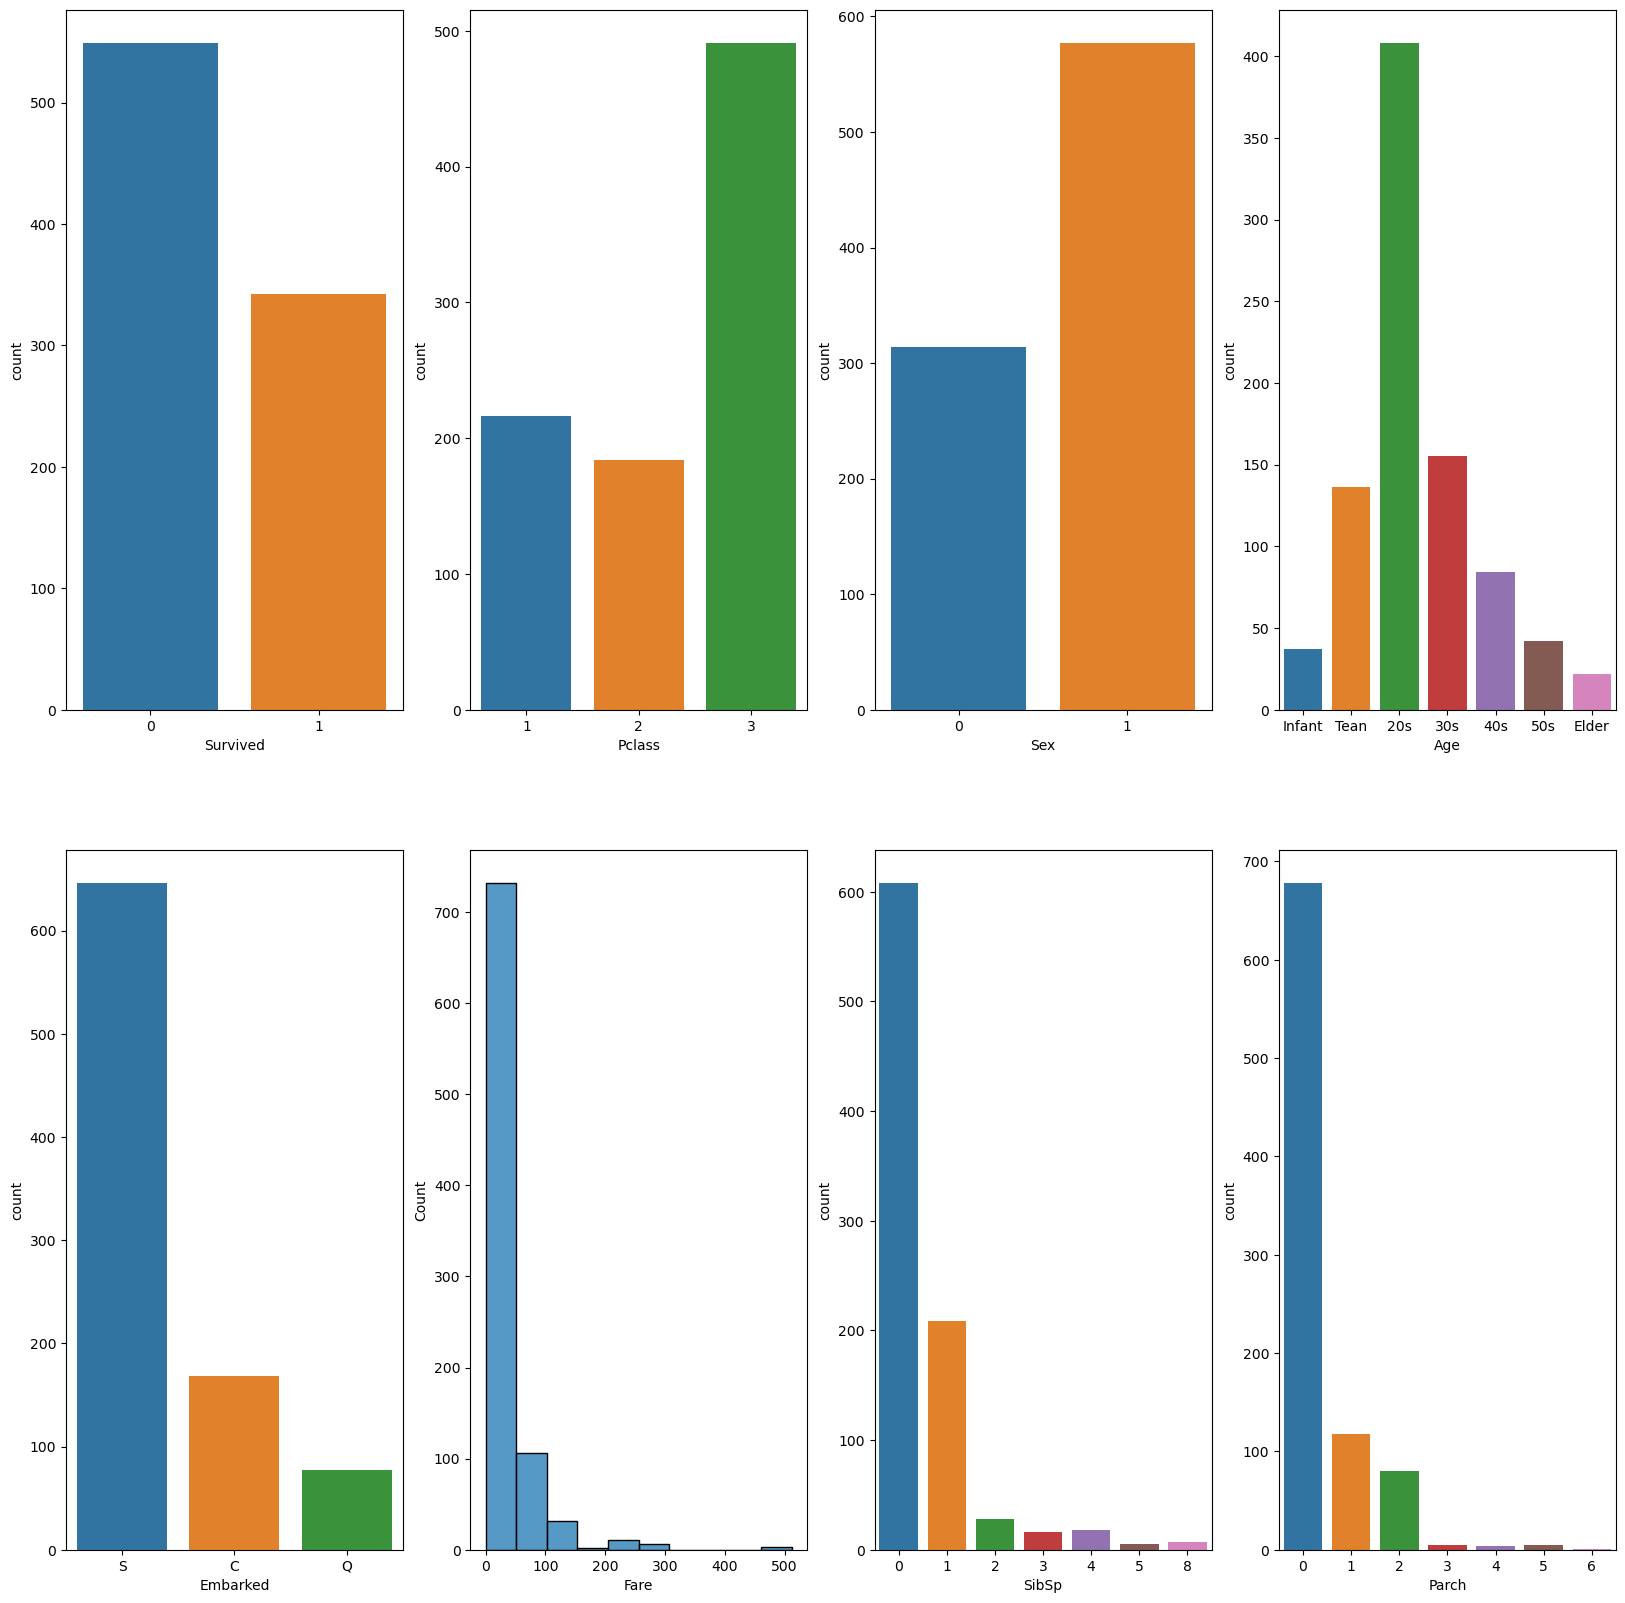

In [65]:
# visulizing the count of the features
fig, ax = plt.subplots(2,4,figsize=(20,20))
sns.countplot(x = 'Survived', data = df, ax= ax[0,0])
sns.countplot(x = 'Pclass', data = df, ax=ax[0,1])
sns.countplot(x = 'Sex', data = df, ax=ax[0,2])
sns.countplot(x = 'Age', data = df, ax=ax[0,3])
sns.countplot(x = 'Embarked', data = df, ax=ax[1,0])
sns.histplot(x = 'Fare', data= df, bins=10, ax=ax[1,1])
sns.countplot(x = 'SibSp', data = df, ax=ax[1,2])
sns.countplot(x = 'Parch', data = df, ax=ax[1,3])

### Visualizing the replationship between the features

<Axes: xlabel='Pclass', ylabel='Survived'>

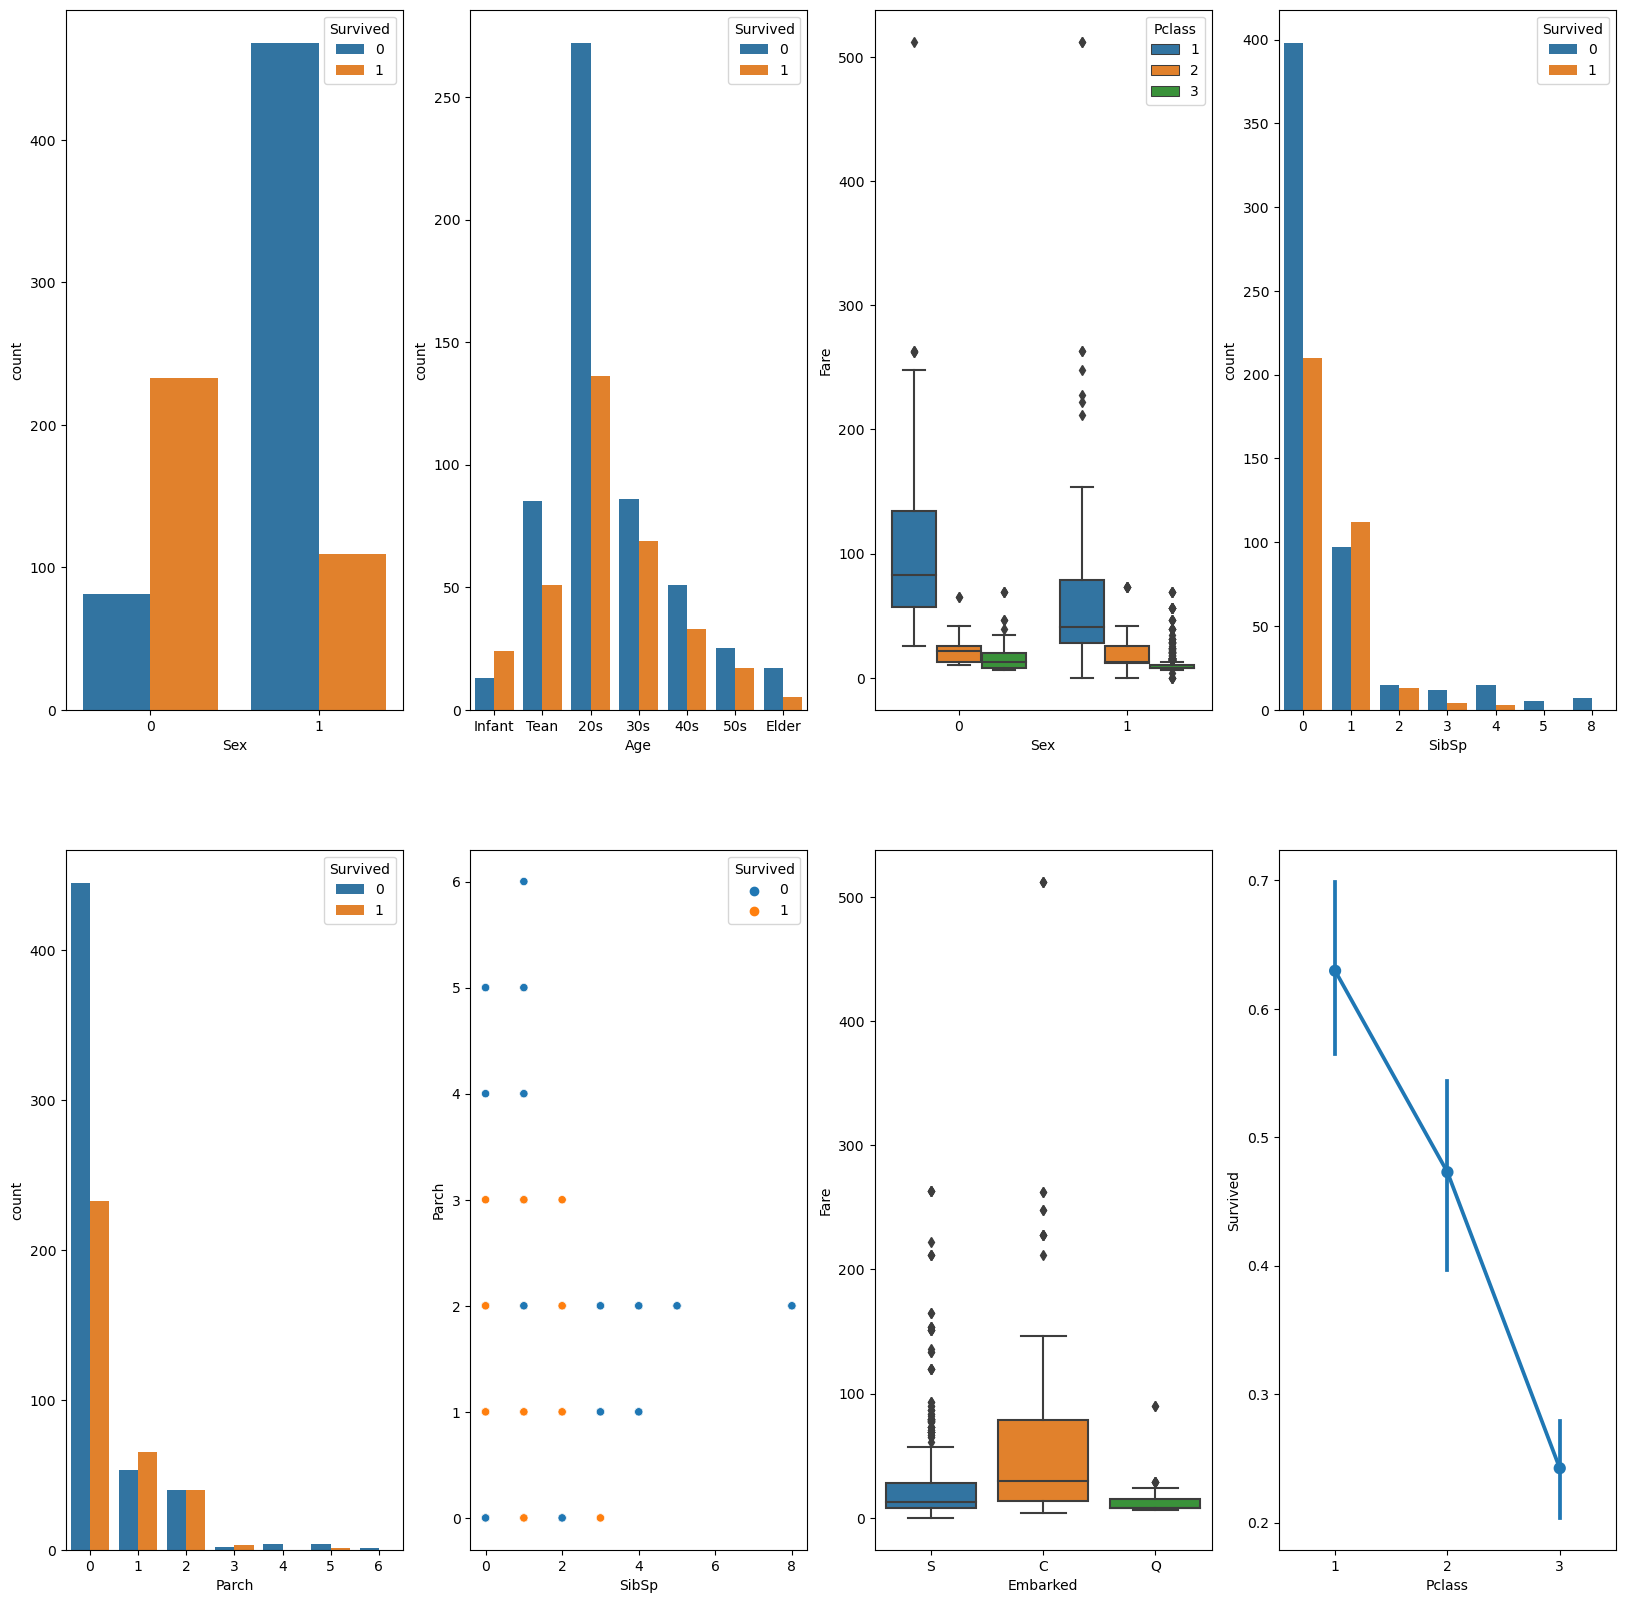

In [66]:
fig, ax = plt.subplots(2,4,figsize=(20,20))
sns.countplot(x = 'Sex', data = df, hue = 'Survived', ax= ax[0,0])
sns.countplot(x = 'Age', data = df, hue = 'Survived', ax=ax[0,1])
sns.boxplot(x = 'Sex',y='Fare', data = df, hue = 'Pclass', ax=ax[0,2])
sns.countplot(x = 'SibSp', data = df, hue = 'Survived', ax=ax[0,3])
sns.countplot(x = 'Parch', data = df, hue = 'Survived', ax=ax[1,0])
sns.scatterplot(x = 'SibSp', y = 'Parch', data = df,hue = 'Survived', ax=ax[1,1])
sns.boxplot(x = 'Embarked', y ='Fare', data = df, ax=ax[1,2])
sns.pointplot(x = 'Pclass', y = 'Survived', data = df, ax=ax[1,3])

In [68]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(['S','C','Q'])
df['Embarked'] = le.transform(df['Embarked'])

In [69]:
age_mapping = {
    'infant': 0,
    'teen': 1,
    '20s': 2,
    '30s': 3,
    '40s': 4,
    '50s': 5,
    'elder': 6}
df['Age'] = df['Age'].map(age_mapping)
df.dropna(subset=['Age'], axis= 0, inplace = True)

## Corelation Heatmap

<Axes: >

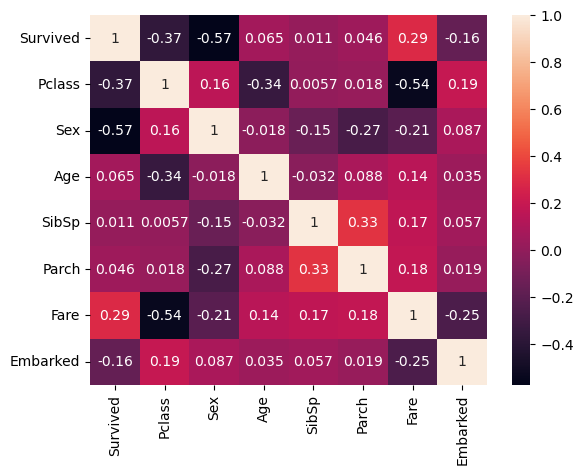

In [71]:
sns.heatmap(df.corr(), annot= True)

# Separating the traget and independent variable

In [72]:
y = df['Survived']
x = df.drop(columns=['Survived'])

# Model Training

## Logistics Regression

In [77]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr

LogisticRegression()

In [78]:
lr.fit(x,y)
lr.score(x,y)

0.818577648766328

# Decision Tree Classifier

In [79]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree

DecisionTreeClassifier()

In [80]:
dtree.fit(x,y)
dtree.score(x,y)

0.9404934687953556

# Support Vector Machine (SVM)

In [81]:
from sklearn.svm import SVC
svm = SVC()
svm

SVC()

In [82]:
svm.fit(x,y)
svm.score(x,y)

0.7024673439767779

# K-Nearest Neighbor

In [83]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn

KNeighborsClassifier()

In [84]:
knn.fit(x,y)
knn.score(x,y)

0.8214804063860668

# Predicting using Decision Tree Classifier

In [85]:
tree_pred = dtree.predict(x)

In [86]:
from sklearn.metrics import accuracy_score
accuracy_score(y, tree_pred)

0.9404934687953556

# Confusion Matrix

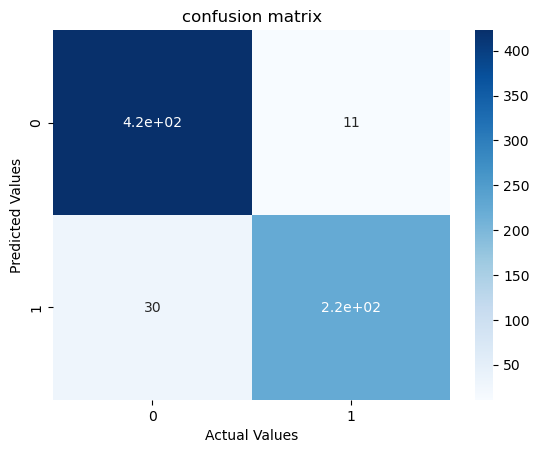

In [87]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y,tree_pred),annot= True, cmap = 'Blues')
plt.ylabel('Predicted Values')
plt.xlabel('Actual Values')
plt.title('confusion matrix')
plt.show()